<a href="https://colab.research.google.com/github/borja-izquierdo/finance/blob/main/Logarithmic_Price_Scale_Indices_Returns_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing the necessary libraries

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt

In [6]:
#Declaring the data range for our stock  returns (using timedelta)

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*10)
endDate, startDate

(datetime.datetime(2023, 11, 11, 19, 7, 18, 61791),
 datetime.datetime(2013, 11, 13, 19, 7, 18, 61791))

In [9]:
#Creating a list of the indexes

indeces = ['^GSPC','^N225','^N100']

In [10]:
#Downloading the indeces data from Yahoo Finance

df = yf.download(indeces, start = startDate, end = endDate)

[*********************100%%**********************]  3 of 3 completed


In [11]:
#Let's take a look at whats in the dataframe

df.head()

Adj Close                                  Close              \
                  ^GSPC       ^N100         ^N225        ^GSPC       ^N100   
Date                                                                         
2013-11-13          NaN  796.309998  14567.160156          NaN  796.309998   
2013-11-14  1790.619995  804.679993  14876.410156  1790.619995  804.679993   
2013-11-15  1798.180054  805.210022  15165.919922  1798.180054  805.210022   
2013-11-18  1791.530029  809.020020  15164.299805  1791.530029  809.020020   
2013-11-19  1787.869995  802.640015  15126.559570  1787.869995  802.640015   

                                 High                                    Low  \
                   ^N225        ^GSPC       ^N100         ^N225        ^GSPC   
Date                                                                           
2013-11-13  14567.160156          NaN  801.059998  14599.530273          NaN   
2013-11-14  14876.410156  1791.530029  805.109985  14966.429688  1780.219971   
2013-11-15  15165.919922  1798.219971  806.270020  15203.110352  1790.660034   
2013-11-18  15164.299805  1802.329956  811.460022  15273.610352  1788.000000   
2013-11-19  15126.559570  1795.510010  806.239990  15163.059570  1784.719971   

                                             Open                            \
                 ^N100         ^N225        ^GSPC       ^N100         ^N225   
Date                                                                          
2013-11-13  791.510010  14490.919922          NaN  797.989990  14527.969727   
2013-11-14  800.309998  14665.750000  1782.750000  804.669983  14665.750000   
2013-11-15  801.880005  14994.700195  1790.660034  804.010010  15034.330078   
2013-11-18  801.969971  15106.820312  1798.819946  803.909973  15253.240234   
2013-11-19  801.359985  15020.330078  1790.790039  806.020020  15096.629883   

                  Volume                            
                   ^GSPC        ^N100        ^N225  
Date                                                
2013-11-13           NaN  202067400.0  170200000.0  
2013-11-14  3.139060e+09  222833100.0  190100000.0  
2013-11-15  3.254820e+09  202542200.0  212600000.0  
2013-11-18  3.168520e+09  189230800.0  180100000.0  
2013-11-19  3.224450e+09  199058600.0  130200000.0

In [13]:
#Selecting only 'Adj Close' prices

adj_close_prices = df['Adj Close']
adj_close_prices.head()

,^GSPC,^N100,^N225
Date,,,
2013-11-13,NaN,796.309998,14567.160156
2013-11-14,1790.619995,804.679993,14876.410156
2013-11-15,1798.180054,805.210022,15165.919922
2013-11-18,1791.530029,809.020020,15164.299805
2013-11-19,1787.869995,802.640015,15126.559570


In [17]:
#Calculating the anual returns

log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()


,^GSPC,^N100,^N225
Date,,,
2013-11-13,NaN,NaN,NaN
2013-11-14,NaN,0.010456,0.021007
2013-11-15,0.004213,0.000658,0.019274
2013-11-18,-0.003705,0.004721,-0.000107
2013-11-19,-0.002045,-0.007917,-0.002492


In [18]:
#Calculating the cumulative returns

cumulative_log_returns = log_returns.cumsum()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

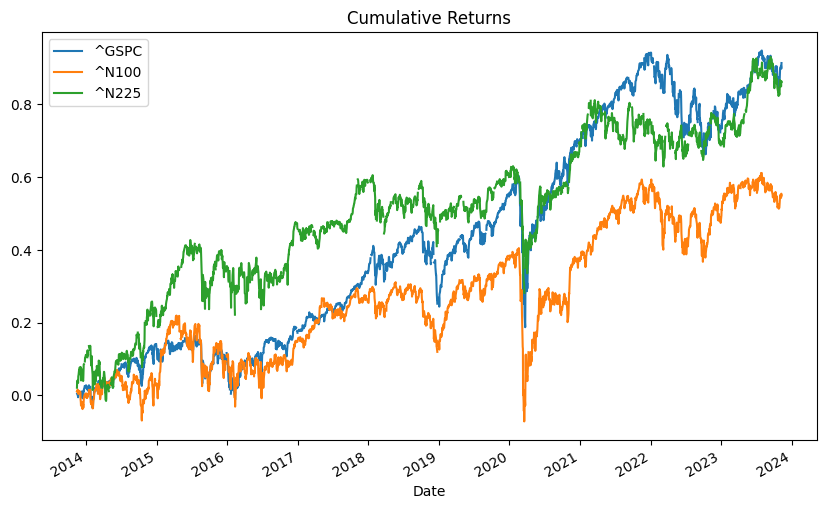

In [19]:
#Plotting the cumulative returns

cumulative_log_returns.plot(title = 'Cumulative Returns', figsize =(10,6))